In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/4U 1543-47.txt")

4U 1543-47
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  90
Converting uncertainties to 68% (assuming Gaussian errors).
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,4U 1543-47,90,[Zhang et al. 2025 & https://ui.adsabs.harvard...,[Zhang et al. 2025 & https://ui.adsabs.harvard...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,4U 1543-47,1624136593,L,59384.8895,0.0104,decay,SS,0.405,0.028462,NaN,-0.85,0.32,False
1,4U 1543-47,1624752089,L,59392.0130,0.0104,decay,SS,0.250,0.035288,NaN,-0.31,0.63,False
2,4U 1543-47,1625431872,L,59399.8811,0.0104,decay,SS,0.149,0.022282,NaN,-0.94,0.78,False
3,4U 1543-47,1626045690,L,59406.9992,0.0104,decay,SS,0.121,0.025722,NaN,NaN,NaN,False
4,4U 1543-47,1627313073,L,59421.6822,0.0104,decay,SS,0.066,0.022000,NaN,NaN,NaN,True


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,4U 1543-47,1055000000,59377.5371,0.0136,rise,SS,1.875000e-07,1.875798e-08,1.875631e-08,tbfeo*cflux*diskbb,chi,False
1,4U 1543-47,14374001,59378.2802,0.0223,rise,SS,2.608000e-07,2.608708e-08,2.608574e-08,tbfeo*cflux*diskbb,chi,False
2,4U 1543-47,14374002,59379.3422,0.0224,rise,SS,3.097000e-07,3.097859e-08,3.097722e-08,tbfeo*cflux*diskbb,chi,False
3,4U 1543-47,14374004,59380.9479,0.0088,rise,SS,3.260000e-07,3.261836e-08,3.262267e-08,tbfeo*cflux*diskbb,chi,False


# Light Curves

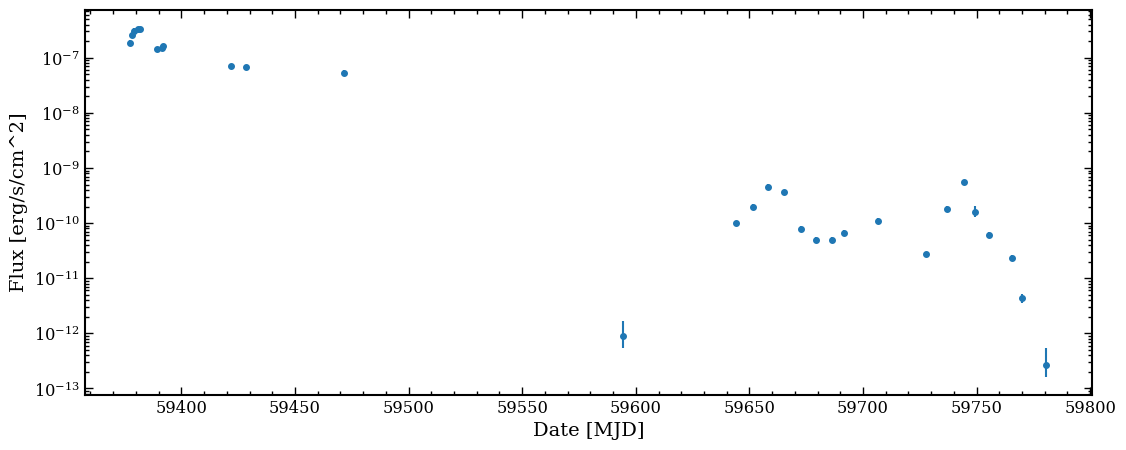

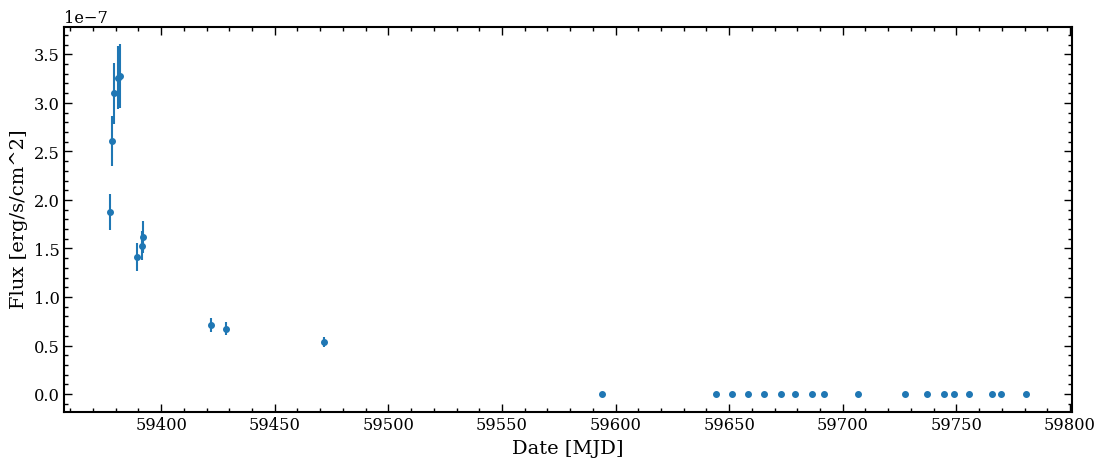

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

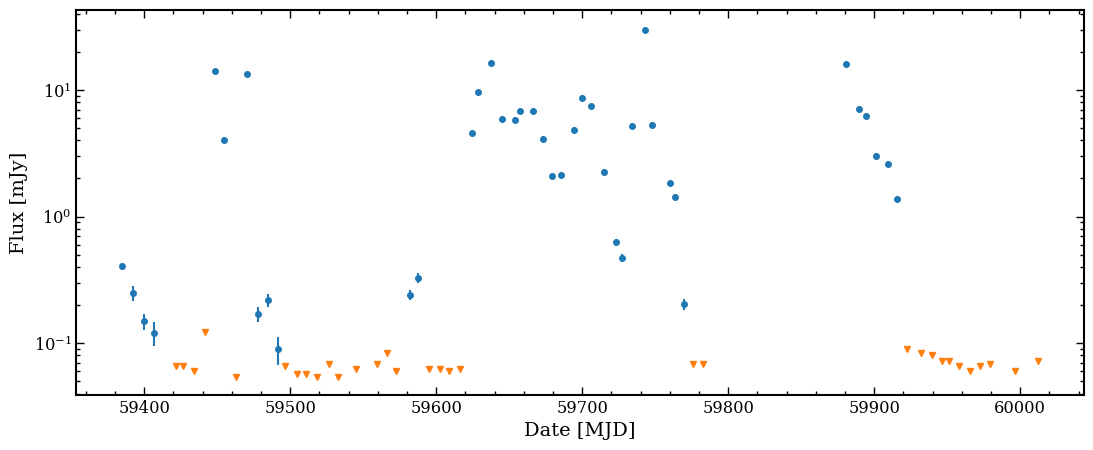

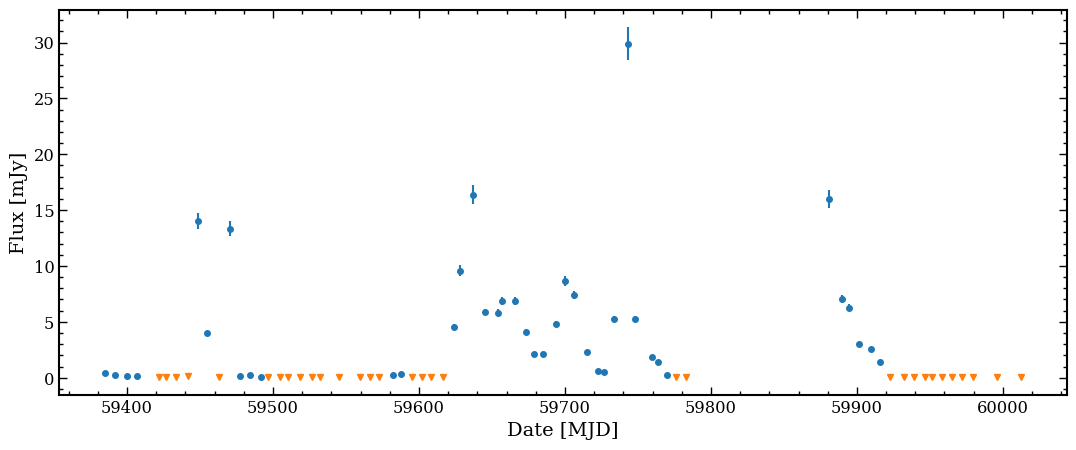

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59392.013000000     0.25000             0.03529             2         1.57154e-07                   1.11259e-08                   1.11243e-08                   False          False          SS             
59421.682200000     0.06600             0.02200             1         7.10300e-08                   7.10438e-09                   7.10426e-09                   True           False          SS             
59666.058200000     6.87100             0.34425             1         3.65700e-10                   3.84062e-11                   3.85002e-11                   False          False          HS             
59673.036200000     4.11100             0.20652             1         7.92000e-11                   1.00964e-11                   9.91076e-12                   False          F

In [9]:
# If I use a normal (instead of weighted) average for Fx when pairing -- it does not make much difference
paired_arr, unpaired_arr = pair_obs_alg(radio_df, xray_df, dt_mjd=1, weighted_ave = False)
print()
print(unpaired_arr)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59392.013000000     0.25000             0.03529             2         1.57400e-07                   1.11434e-08                   1.11417e-08                   False          False          SS             
59421.682200000     0.06600             0.02200             1         7.10300e-08                   7.10438e-09                   7.10426e-09                   True           False          SS             
59666.058200000     6.87100             0.34425             1         3.65700e-10                   3.84062e-11                   3.85002e-11                   False          False          HS             
59673.036200000     4.11100             0.20652             1         7.92000e-11                   1.00964e-11                   9.91076e-12                   False          F

In [10]:
paired_data[["t"]]

,t
0,59392.0130
1,59421.6822
2,59666.0582
3,59673.0362
4,59679.0390
5,59706.0027
6,59727.0882
7,59769.8216


In [11]:
lr_all, lx_all, all_types = get_bahramian_data()

Only including detections from Bahramian et al. data.
Converting Bahramian Lr values from 5 GHz to 1.28 GHz, assuming flat spectral index.


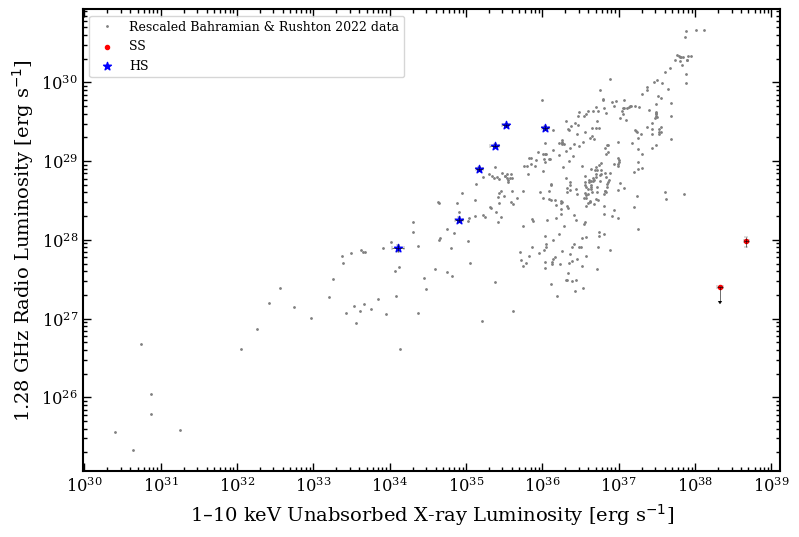

In [12]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  806
Rejected based on distance: radio_MJD = 59384.8895; time_to_nearest: 3.0864000000001397; time_to_furthest: 4.493300000001909
59392.013: time_to_nearest: 0.06730000000243308 & time_to_furthest: 0.45820000000094296; y_predict_err: 0.04278672962955277
Rejected based on distance: radio_MJD = 59399.8811; time_to_nearest: 7.800799999997253; time_to_furthest: 22.145900000003166
Rejected based on distance: radio_MJD = 59406.9992; time_to_nearest: 14.918899999996938; time_to_furthest: 15.02780000000348
59421.6822: time_to_nearest: 0.3447999999989406 & time_to_furthest: 29.60190000000148; y_predict_err: 0.048080971031911446
59426.823: time_to_nearest: 1.7101000000038766 & time_to_furthest: 4.7959999999948195; y_predict_err: 0.03673920531835062
Rejected based on distance: radio_MJD = 59433.8154; time_to_nearest: 5.282299999998941; time_to_furthest: 37.79490000000078
Rejected based on distance: radio_MJD = 59441.8734; time_to_nearest: 13.3402999

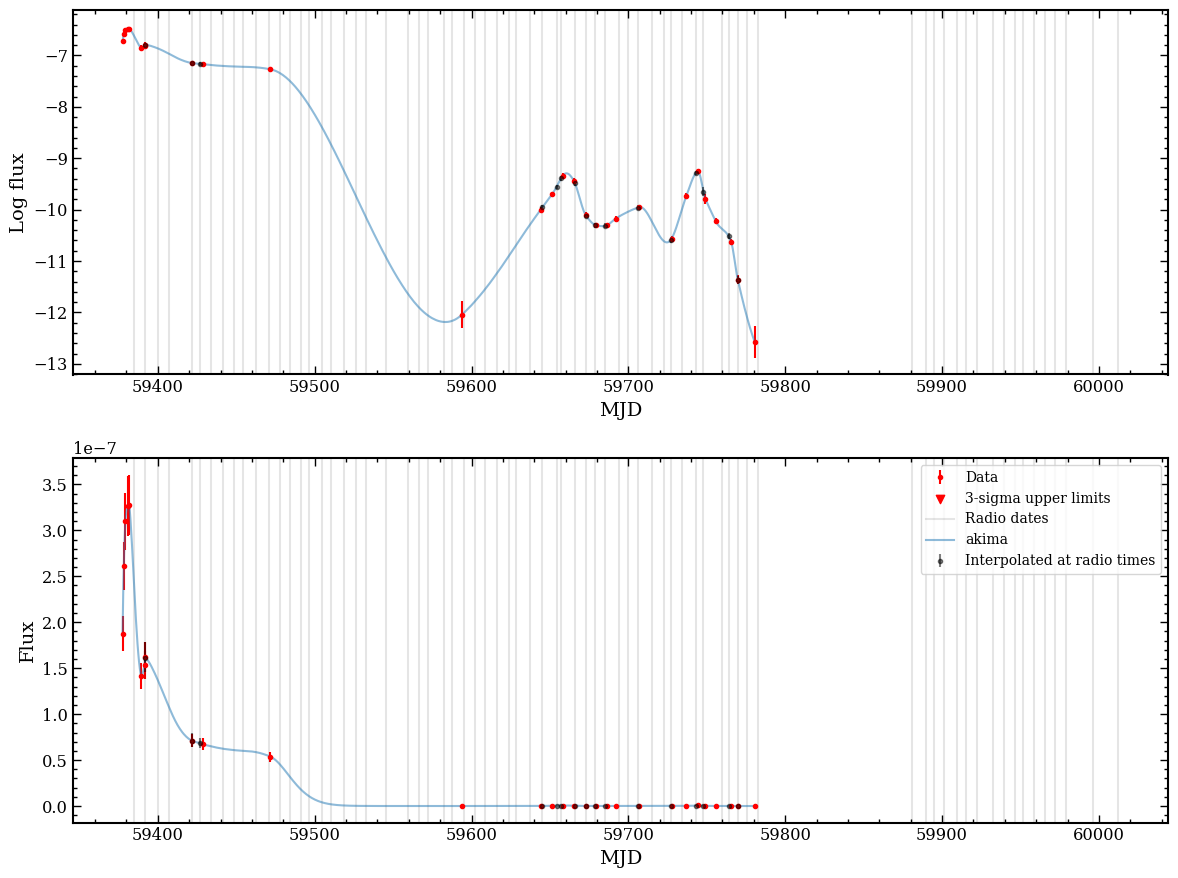

Number of used interpolated data points:  16
Converting to luminosity using d_kpc = 5.0


In [13]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df)

In [14]:
interpolated_data[["t", "Lr", "Lx"]]

,t,Lr,Lx
0,59392.0130,9.573962e+27,4.827060e+38
1,59421.6822,2.527526e+27,2.130160e+38
2,59426.8230,2.527526e+27,2.045530e+38
3,59645.2352,2.257540e+29,3.323288e+35
4,59654.2191,2.233414e+29,8.338037e+35
5,59657.0687,2.631691e+29,1.205751e+36
6,59666.0582,2.631308e+29,9.654601e+35
7,59673.0362,1.574342e+29,2.291608e+35
8,59679.0390,7.965536e+28,1.498394e+35
9,59685.1738,8.214459e+28,1.442854e+35


In [15]:
filtered = interpolated_data[interpolated_data["state"]=="HS"]
filtered[["t", "state", "Lr", "Lx"]]

,t,state,Lr,Lx
3,59645.2352,HS,2.257540e+29,3.323288e+35
4,59654.2191,HS,2.233414e+29,8.338037e+35
5,59657.0687,HS,2.631691e+29,1.205751e+36
6,59666.0582,HS,2.631308e+29,9.654601e+35
7,59673.0362,HS,1.574342e+29,2.291608e+35
8,59679.0390,HS,7.965536e+28,1.498394e+35
9,59685.1738,HS,8.214459e+28,1.442854e+35
10,59706.0027,HS,2.838871e+29,3.276481e+35
11,59727.0882,HS,1.807564e+28,7.749528e+34
12,59742.9194,HS,1.144510e+30,1.544138e+36


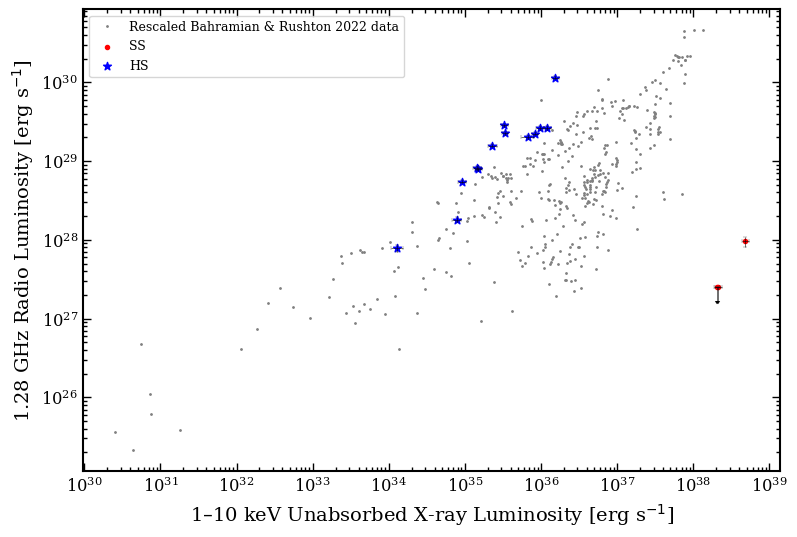

In [16]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

---

# NICER Data
Used to generate Figure 3 in the paper. 

In [17]:
_, _, _, xray_nicer_df  = read_data('../DATA/NICER/4U 1543-47_NICER.txt')

4U 1543-47_NICER
Warning for row(s): [1] -- Fr or Fr_unc is empty for this detection.
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  90
Converting uncertainties to 68% (assuming Gaussian errors).
Added 10.0% systematic uncertainty to the X-ray data.


In [18]:
xray_nicer_df.head()

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,4U 1543-47_NICER,4202230137,59415.1125,NaN,NaN,Unclear,7.040000e-08,7.040017e-09,7.040017e-09,NaN,NaN,False
1,4U 1543-47_NICER,4202230138,59416.5891,NaN,NaN,Unclear,6.910000e-08,6.910030e-09,6.910049e-09,NaN,NaN,False
2,4U 1543-47_NICER,4202230140,59425.8029,NaN,NaN,Unclear,6.550000e-08,6.550034e-09,6.550025e-09,NaN,NaN,False
3,4U 1543-47_NICER,4202230141,59426.1273,NaN,NaN,Unclear,6.550000e-08,6.550026e-09,6.550039e-09,NaN,NaN,False
4,4U 1543-47_NICER,4202230142,59427.2257,NaN,NaN,Unclear,6.520000e-08,6.520013e-09,6.520024e-09,NaN,NaN,False


In [19]:
paired_data_nicer = make_paired_Lr_Lx_df(radio_df, xray_nicer_df, source_df, save=False)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59426.823000000     0.06600             0.02200             2         6.53493e-08                   4.62092e-09                   4.62093e-09                   True           False          SS             
59433.815400000     0.06000             0.02000             1         6.32000e-08                   6.32006e-09                   6.32002e-09                   True           False          SS             
59454.630700000     4.01600             0.20200             1         5.89000e-08                   5.91397e-09                   5.89217e-09                   False          False          SS             
59470.600000000     13.32000            0.66647             2         5.07499e-08                   3.58911e-09                   3.58867e-09                   False          F

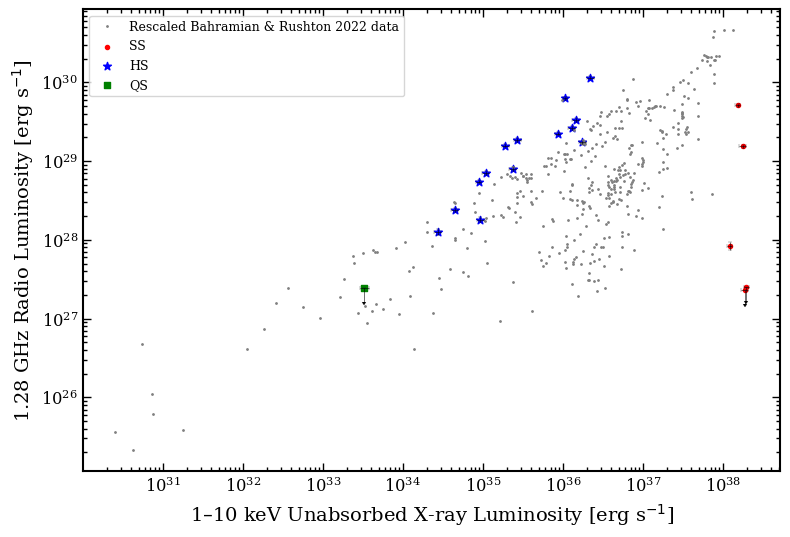

In [20]:
plot_Lr_Lx(paired_data_nicer, colourby="state", lx=lx_all, lr=lr_all)

dt1, dt2:  3.0 10.0

Number of plotting points:  730
Rejected based on distance: radio_MJD = 59384.8895; time_to_nearest: 30.223000000005413; time_to_furthest: 59384.8895
Rejected based on distance: radio_MJD = 59392.013; time_to_nearest: 23.0995000000039; time_to_furthest: 59392.013
Rejected based on distance: radio_MJD = 59399.8811; time_to_nearest: 15.231400000004214; time_to_furthest: 59399.8811
Rejected based on distance: radio_MJD = 59406.9992; time_to_nearest: 8.113300000004529; time_to_furthest: 59406.9992
Rejected based on distance: radio_MJD = 59421.6822; time_to_nearest: 4.120699999999488; time_to_furthest: 5.0931000000055064
59426.823: time_to_nearest: 0.40270000000600703 & time_to_furthest: 0.6956999999965774; y_predict_err: 0.03699913544157685
59433.8154: time_to_nearest: 0.6468999999997322 & time_to_furthest: 2.631600000000617; y_predict_err: 0.04615757583728097
59441.8734: time_to_nearest: 1.4204000000027008 & time_to_furthest: 3.6292999999932363; y_predict_err: 0.03817

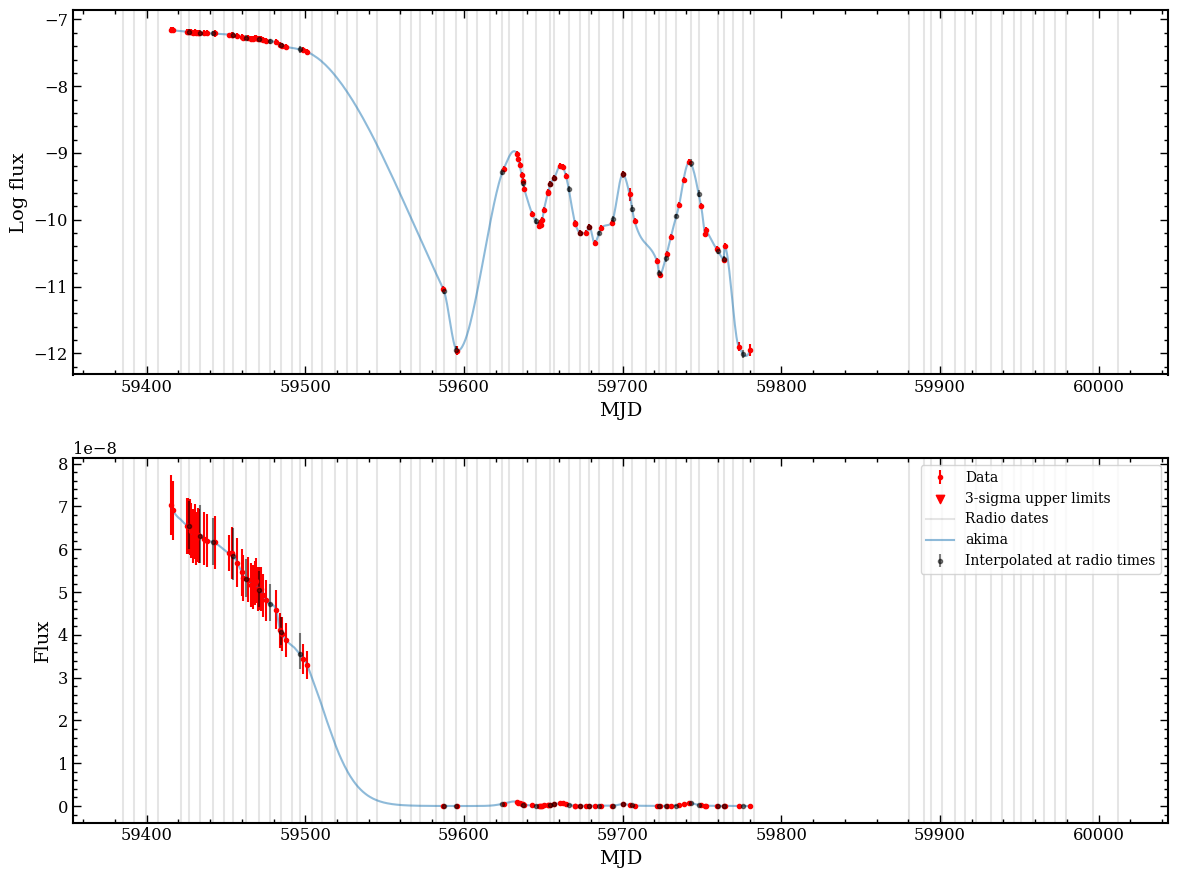

Number of used interpolated data points:  31
Converting to luminosity using d_kpc = 5.0


In [21]:
interpolated_data_nicer = make_interpolated_Lr_Lx_df(radio_df, xray_nicer_df, source_df, save=False)

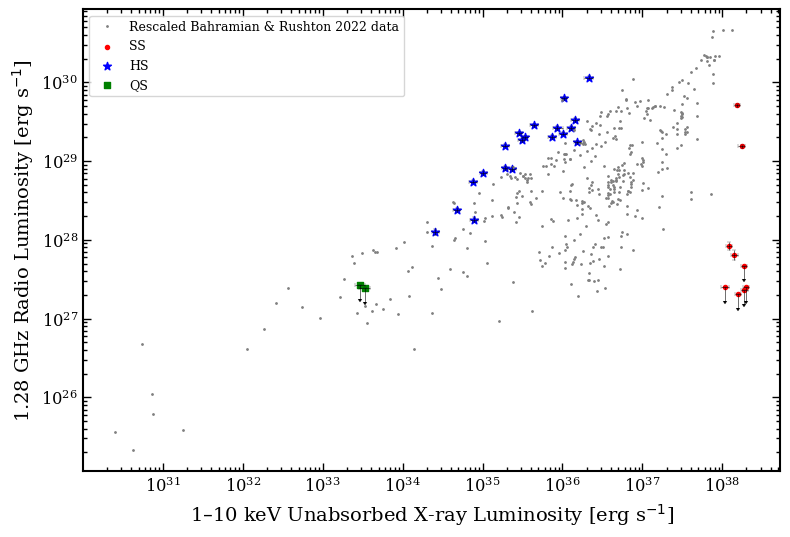

In [22]:
plot_Lr_Lx(interpolated_data_nicer, colourby="state", lx=lx_all, lr=lr_all)

# Comparing NICER and Swift/XRT:

In [23]:
# MJD 59679

swift_row = xray_df[xray_df['t_xray'] == 59679.1084]
print(swift_row)
print()
nicer_row = xray_nicer_df[xray_nicer_df['t_xray'] == 59679.0609]
print(nicer_row)

print()
print()

# Upper limit Swift 
u = swift_row["Fx"] + swift_row["Fx_unc_u"] 
print(u.values[0])

# Lower limit NICER
l = nicer_row["Fx"] - nicer_row["Fx_unc_l"] 
print(l.values[0])

          name     obsID      t_xray  dt_xray Xphase Xstate            Fx      Fx_unc_l      Fx_unc_u                 model fit_stat  Fx_uplim_bool
17  4U 1543-47  89352016  59679.1084    0.012  decay     HS  5.000000e-11  5.387484e-12  5.387484e-12  tbfeo*cflux*powerlaw      chi          False

                name       obsID      t_xray  dt_xray  Xphase   Xstate            Fx      Fx_unc_l      Fx_unc_u  model  fit_stat  Fx_uplim_bool
56  4U 1543-47_NICER  5202230207  59679.0609      NaN     NaN  Unclear  7.840000e-11  7.885411e-12  7.898625e-12    NaN       NaN          False


5.53874835382788e-11
7.051458876484237e-11


dt1, dt2:  3.0 10.0

Number of plotting points:  806
Rejected based on distance: radio_MJD = 59384.8895; time_to_nearest: 3.0864000000001397; time_to_furthest: 4.493300000001909
59392.013: time_to_nearest: 0.06730000000243308 & time_to_furthest: 0.45820000000094296; y_predict_err: 0.04278672962955277
Rejected based on distance: radio_MJD = 59399.8811; time_to_nearest: 7.800799999997253; time_to_furthest: 22.145900000003166
Rejected based on distance: radio_MJD = 59406.9992; time_to_nearest: 14.918899999996938; time_to_furthest: 15.02780000000348
59421.6822: time_to_nearest: 0.3447999999989406 & time_to_furthest: 29.60190000000148; y_predict_err: 0.048080971031911446
59426.823: time_to_nearest: 1.7101000000038766 & time_to_furthest: 4.7959999999948195; y_predict_err: 0.03673920531835062
Rejected based on distance: radio_MJD = 59433.8154; time_to_nearest: 5.282299999998941; time_to_furthest: 37.79490000000078
Rejected based on distance: radio_MJD = 59441.8734; time_to_nearest: 13.3402999

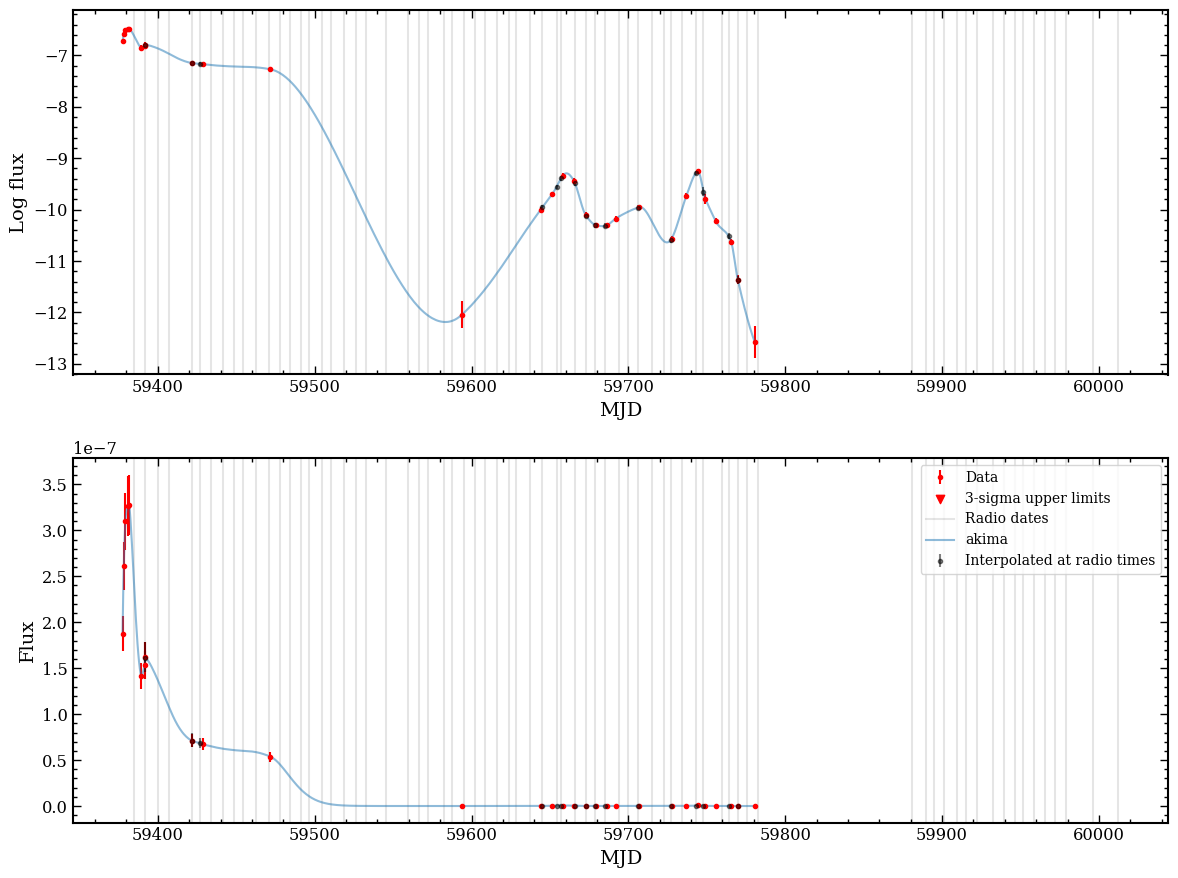

dt1, dt2:  3.0 10.0

Number of plotting points:  730
Rejected based on distance: radio_MJD = 59384.8895; time_to_nearest: 30.223000000005413; time_to_furthest: 59384.8895
Rejected based on distance: radio_MJD = 59392.013; time_to_nearest: 23.0995000000039; time_to_furthest: 59392.013
Rejected based on distance: radio_MJD = 59399.8811; time_to_nearest: 15.231400000004214; time_to_furthest: 59399.8811
Rejected based on distance: radio_MJD = 59406.9992; time_to_nearest: 8.113300000004529; time_to_furthest: 59406.9992
Rejected based on distance: radio_MJD = 59421.6822; time_to_nearest: 4.120699999999488; time_to_furthest: 5.0931000000055064
59426.823: time_to_nearest: 0.40270000000600703 & time_to_furthest: 0.6956999999965774; y_predict_err: 0.03699913544157685
59433.8154: time_to_nearest: 0.6468999999997322 & time_to_furthest: 2.631600000000617; y_predict_err: 0.04615757583728097
59441.8734: time_to_nearest: 1.4204000000027008 & time_to_furthest: 3.6292999999932363; y_predict_err: 0.03817

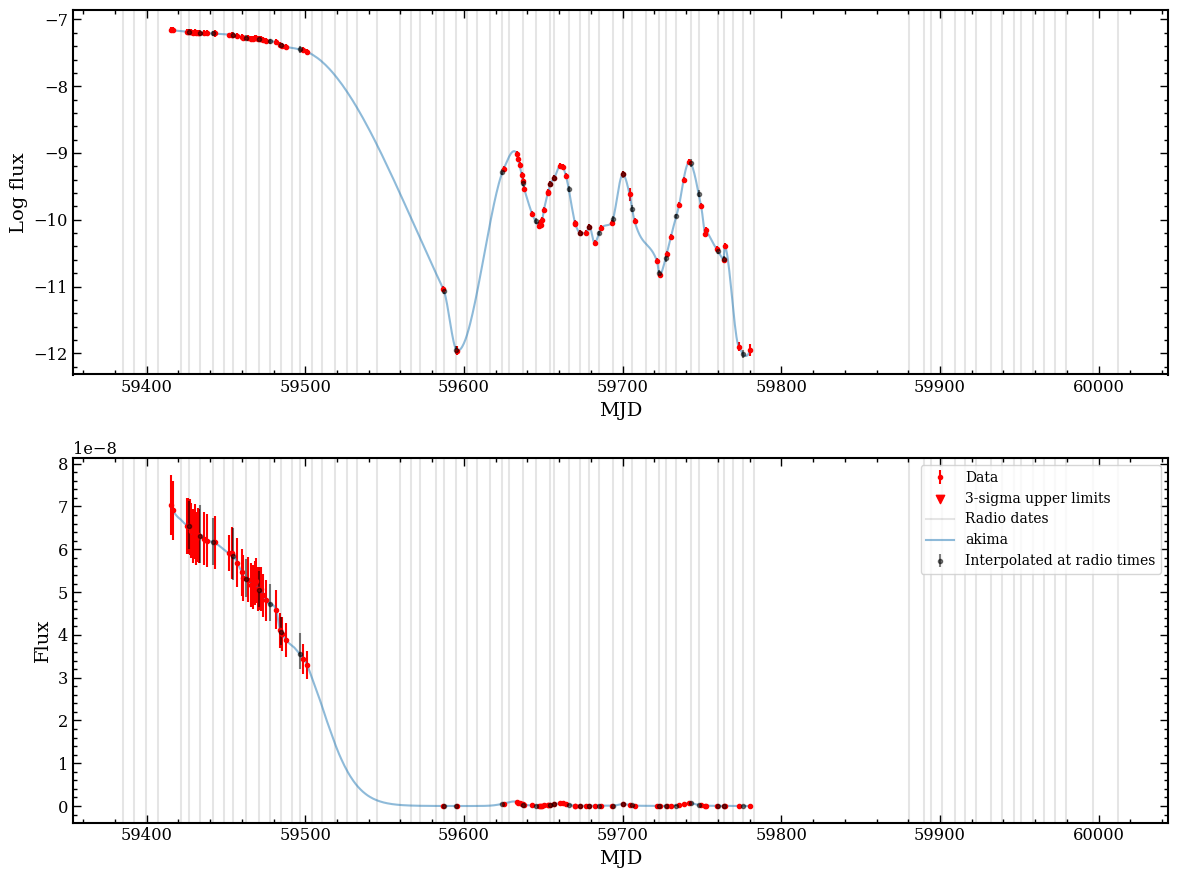

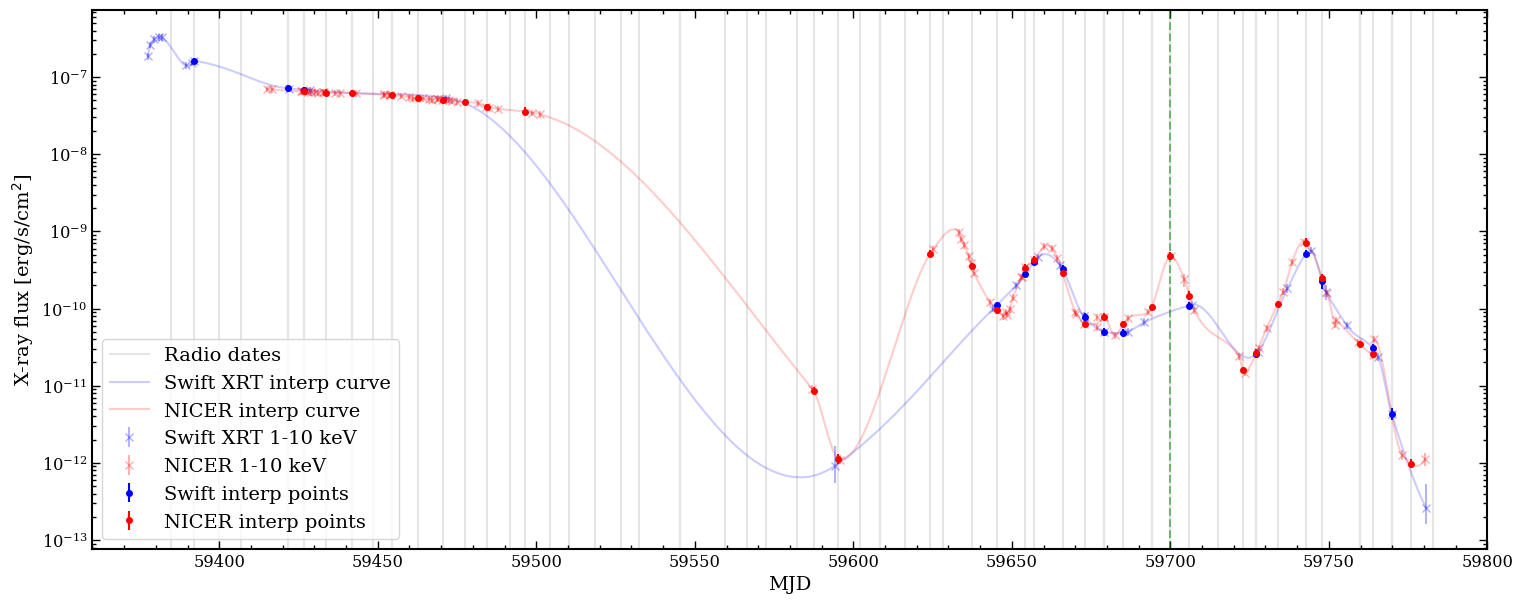

In [24]:
# Compare the interpolated curves


#############
## GET INTERPOLATED CURVES

source_name = source_df["name"][0]

## Radio
radio_dates = radio_df["t_radio"].to_numpy()


## Swift/XRT
xray_dates = xray_df ["t_xray"].to_numpy()
xray_flux = xray_df ["Fx"].to_numpy()
xray_flux_unc_l = xray_df ["Fx_unc_l"].to_numpy()
xray_flux_unc_u = xray_df ["Fx_unc_u"].to_numpy()
xray_uplims = xray_df ["Fx_uplim_bool"].to_numpy()
y_predict, y_predict_err_l, y_predict_err_u, y_predict_uplim_bool, x_plot, mean_results_plot = interp_data_scipy_MC(xray_dates, xray_flux, xray_flux_unc_l, xray_flux_unc_u, xray_uplims, radio_dates,  testing=True)


## NICER/XTI
xray_dates_NICER = xray_nicer_df ["t_xray"].to_numpy()
xray_flux_NICER = xray_nicer_df ["Fx"].to_numpy()       
xray_flux_unc_l_NICER = xray_nicer_df ["Fx_unc_l"].to_numpy()
xray_flux_unc_u_NICER = xray_nicer_df ["Fx_unc_u"].to_numpy()
xray_uplims_NICER = xray_nicer_df ["Fx_uplim_bool"].to_numpy()
y_predict_NICER, y_predict_err_l_NICER, y_predict_err_u_NICER, y_predict_uplim_bool_NICER, x_plot_NICER, mean_results_plot_NICER = interp_data_scipy_MC(xray_dates_NICER, xray_flux_NICER, xray_flux_unc_l_NICER, xray_flux_unc_u_NICER, xray_uplims_NICER, radio_dates,  testing=True)



############
## PLOT INTERPOLATION COMPARISON


## Show data, interpolation lines, and interpolation points

plt.figure(figsize=(18, 7))


# Swift data
plt.errorbar(xray_dates, xray_flux, yerr= [xray_flux_unc_l, xray_flux_unc_u], uplims =xray_uplims, fmt='x', label="Swift XRT 1-10 keV", color='blue', alpha=0.3)


# NICER data
plt.errorbar(xray_dates_NICER, xray_flux_NICER, yerr= [xray_flux_unc_l_NICER, xray_flux_unc_u_NICER], uplims =xray_uplims_NICER, fmt='x', label="NICER 1-10 keV", color='red', alpha=0.3)


# Plot radio MJDs:
for i, date in enumerate(radio_dates):
    if i==0: plt.axvline(date, linestyle='-', color='black', alpha=0.1, label="Radio dates")
    else: plt.axvline(date, linestyle='-', color='black', alpha=0.1)



# Swift interpolation
plt.plot(x_plot, mean_results_plot, color="blue", alpha=0.2, label="Swift XRT interp curve")
plt.errorbar(radio_dates, y_predict, yerr= [y_predict_err_l, y_predict_err_u], uplims=y_predict_uplim_bool, fmt='.', markersize=8, color='blue', alpha=1,label="Swift interp points")


# NICER interpolation
plt.plot(x_plot_NICER, mean_results_plot_NICER, color="red", alpha=0.2, label="NICER interp curve")
plt.errorbar(radio_dates, y_predict_NICER, yerr= [y_predict_err_l_NICER, y_predict_err_u_NICER], uplims=y_predict_uplim_bool_NICER, fmt='.', markersize=8, color='red', alpha=1,label="NICER interp points")



plt.axvline(59699.9951, linestyle='--', color='green', alpha=0.5)

plt.xlabel("MJD")
plt.ylabel(r"X-ray flux [erg/s/cm$^2$]")
plt.xlim([59360,59800])
plt.yscale('log')
plt.legend()
plt.show()



c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 2 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 2 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


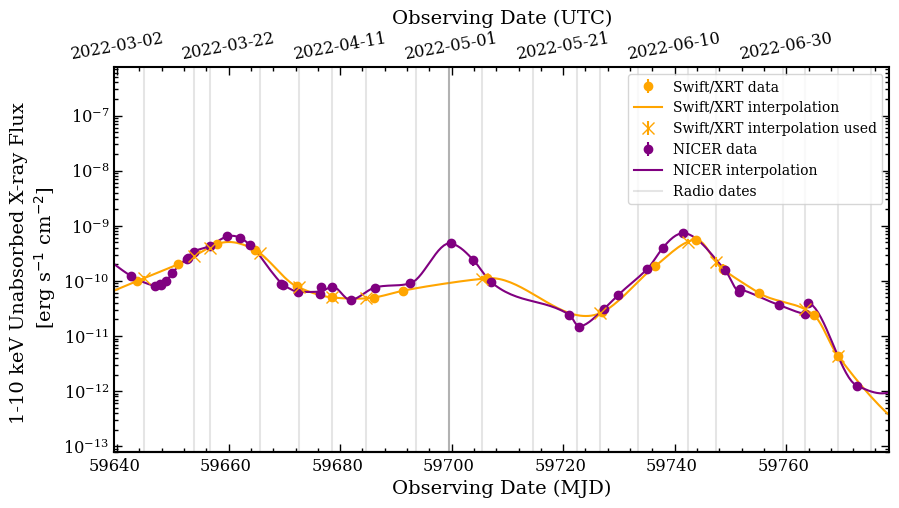

In [25]:
## Zoomed in plot


## Show data, interpolation lines, and interpolation points

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax = np.atleast_1d(ax)


# Swift/XRT data
plt.errorbar( Time(xray_dates, format='mjd').datetime , xray_flux, yerr= [xray_flux_unc_l, xray_flux_unc_u], uplims =xray_uplims, fmt='o', label="Swift/XRT data", color='orange')


# NICER data
plt.errorbar(Time(xray_dates_NICER, format='mjd').datetime , xray_flux_NICER, yerr= [xray_flux_unc_l_NICER, xray_flux_unc_u_NICER], uplims =xray_uplims_NICER, fmt='o', label="NICER data", color='purple')


# Plot radio MJDs:
for i, date in enumerate(radio_dates):
    if i==0: plt.axvline(Time(date, format='mjd').datetime, linestyle='-', color='black', alpha=0.1, label="Radio dates")
    else: plt.axvline(Time(date, format='mjd').datetime, linestyle='-', color='black', alpha=0.1)


# Swift interpolation
plt.plot(Time(x_plot, format='mjd').datetime , mean_results_plot, color="orange", label="Swift/XRT interpolation")


# NICER interpolation
plt.plot( Time(x_plot_NICER, format='mjd').datetime , mean_results_plot_NICER, color="purple",  label="NICER interpolation")


# Swift/XRT data points used
plt.errorbar(Time(radio_dates, format='mjd').datetime, y_predict, yerr= [y_predict_err_l, y_predict_err_u], uplims=y_predict_uplim_bool, fmt='x', markersize=8, color='orange', alpha=1,label="Swift/XRT interpolation used")


plt.axvline(Time(59699.9951, format='mjd').datetime , linestyle='-', color='gray', alpha=0.5)

min_mjd = 59640
max_mjd  = 59778
FormatAxis_new(ax, start_mjd = min_mjd, end_mjd = max_mjd, interval = 20)

plt.ylabel("1-10 keV Unabsorbed X-ray Flux \n"+r" [erg s$^{-1}$ cm$^{-2}$]")
plt.yscale('log')


# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Desired order
desired_order = [
    "Swift/XRT data",
    "Swift/XRT interpolation",
    "Swift/XRT interpolation used",
    "NICER data",
    "NICER interpolation",
    "Radio dates"
]

# Create index mapping from desired order
order = [labels.index(name) for name in desired_order if name in labels]

# Apply reordered legend
plt.legend([handles[i] for i in order], [labels[i] for i in order], fontsize=10)

save_name = "4U1543_swift_nicer_comparison"
plt.savefig(f"../FIGURES/{save_name}.png", dpi=600,bbox_inches="tight")
plt.savefig(f"../FIGURES/{save_name}.pdf", dpi=600,bbox_inches="tight")

plt.show()

In [26]:
# Check the date conversions
from get_data import get_utc

def get_utc(mjd):
    t = Time(mjd, format='mjd')
    utc_datetime = t.to_datetime()
    print(f"MJD {mjd}  -->  UTC {utc_datetime}")

get_utc(59640)
get_utc(59640.01)
get_utc(59640.5)
get_utc(59660)
get_utc(59680)
get_utc(59700)
get_utc(59720)
get_utc(59740)
get_utc(59760)

MJD 59640  -->  UTC 2022-03-02 00:00:00
MJD 59640.01  -->  UTC 2022-03-02 00:14:24
MJD 59640.5  -->  UTC 2022-03-02 12:00:00
MJD 59660  -->  UTC 2022-03-22 00:00:00
MJD 59680  -->  UTC 2022-04-11 00:00:00
MJD 59700  -->  UTC 2022-05-01 00:00:00
MJD 59720  -->  UTC 2022-05-21 00:00:00
MJD 59740  -->  UTC 2022-06-10 00:00:00
MJD 59760  -->  UTC 2022-06-30 00:00:00


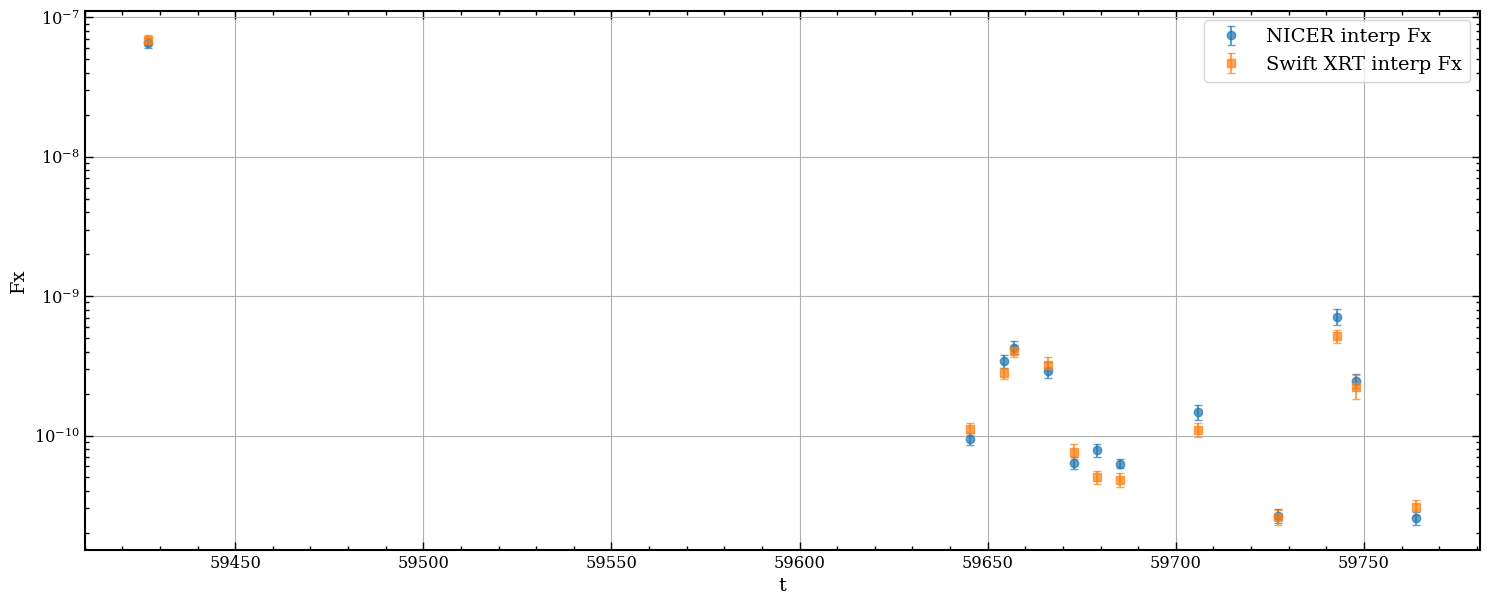

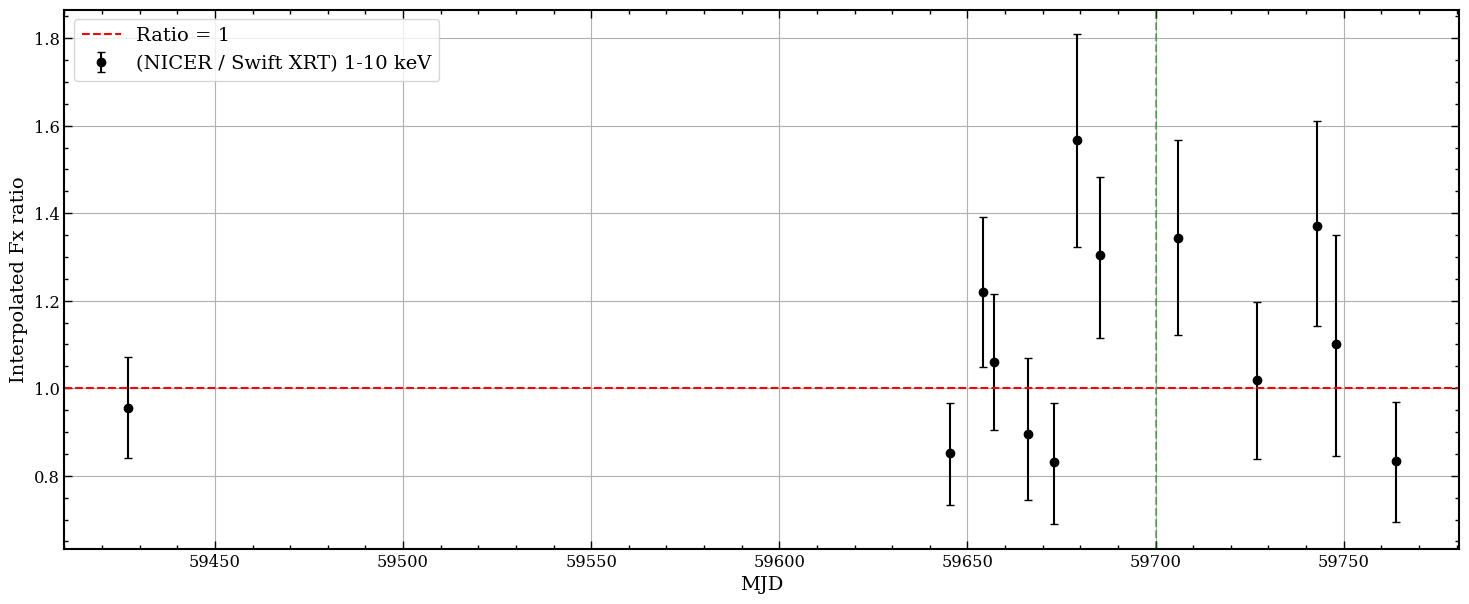

In [27]:

# Merge on radio 't' column to get only matching 't' values
merged_df = pd.merge(
    interpolated_data_nicer[['t', 'Fx', 'Fx_unc_l', 'Fx_unc_u']],
    interpolated_data[['t', 'Fx', 'Fx_unc_l', 'Fx_unc_u']],
    on='t',
    suffixes=('_NICER', '_swift')
)

# Calculate the difference
merged_df['Fx_diff'] = merged_df['Fx_NICER'] - merged_df['Fx_swift']


# Calculate the ratio
Fx_A = merged_df['Fx_NICER']
Fx_B = merged_df['Fx_swift']  
Fx_A_unc_l = merged_df['Fx_unc_l_NICER']
Fx_A_unc_u = merged_df['Fx_unc_u_NICER']
Fx_B_unc_l = merged_df['Fx_unc_l_swift']
Fx_B_unc_u = merged_df['Fx_unc_u_swift']
R = Fx_A / Fx_B
R_unc_l = R * np.sqrt((Fx_A_unc_l / Fx_A)**2 + (Fx_B_unc_u / Fx_B)**2)
R_unc_u = R * np.sqrt((Fx_A_unc_u / Fx_A)**2 + (Fx_B_unc_l / Fx_B)**2)

merged_df['Fx_ratio'] = R
merged_df['Fx_ratio_unc_l'] = R_unc_l
merged_df['Fx_ratio_unc_u'] = R_unc_u



## Plot the results in common

plt.figure(figsize=(18, 7))

# NICER plot
plt.errorbar(
    merged_df['t'], 
    merged_df['Fx_NICER'], 
    yerr=[merged_df['Fx_unc_l_NICER'], merged_df['Fx_unc_u_NICER']],
    fmt='o', capsize=3, label='NICER interp Fx', alpha=0.7
)

# Other plot
plt.errorbar(
    merged_df['t'], 
    merged_df['Fx_swift'], 
    yerr=[merged_df['Fx_unc_l_swift'], merged_df['Fx_unc_u_swift']],
    fmt='s', capsize=3, label='Swift XRT interp Fx', alpha=0.7
)

plt.xlabel('t')
plt.ylabel('Fx')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()


## Plot the ratio of the two

plt.figure(figsize=(18, 7))

plt.errorbar(
    merged_df['t'], 
    merged_df['Fx_ratio'], 
    yerr=[R_unc_l, R_unc_u], 
    fmt='o', capsize=3, label='(NICER / Swift XRT) 1-10 keV', color='black'
)

# Add horizontal line at ratio = 1
plt.axhline(1.0, color='red', linestyle='--', label='Ratio = 1')


plt.axvline(59699.9951, linestyle='--', color='green', alpha=0.5)

plt.xlabel('MJD')
plt.ylabel('Interpolated Fx ratio')
plt.grid(True)
plt.legend()
plt.show()
